# Data visualizations with Python

# Table of content
## 1. Setting up
## 2. Creating several visualizations
## 3. Solving given tasks

# 1. Setting up

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# creating path for later import/export

path = r"C:\Users\Anwender\Documents\07-2023 Instacart Basket Analysis"

In [6]:
# importing df

df = pd.read_pickle(os.path.join(path, "02 Data", "Prepared Data", "orders_products_all.pkl"))

## 2. Creating several visualizations

### Bar chart

<Axes: >

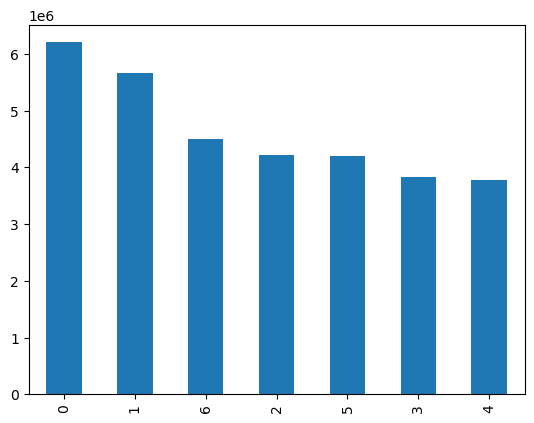

In [7]:
df['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

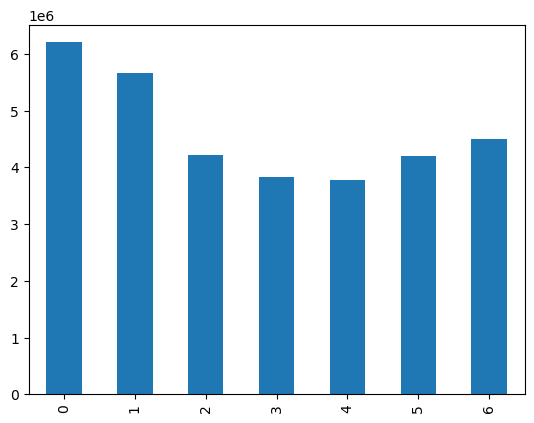

In [8]:
# sorting by index

df["orders_day_of_week"].value_counts().sort_index().plot.bar()

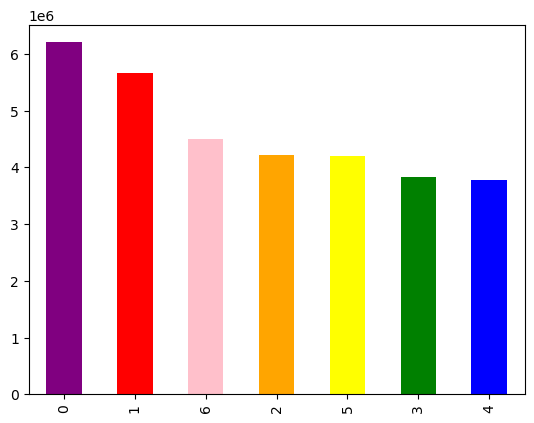

In [9]:
# adding color

bar = df['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [10]:
# exporting bar figure

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

### Histograms and Scatterplots

<Axes: ylabel='Frequency'>

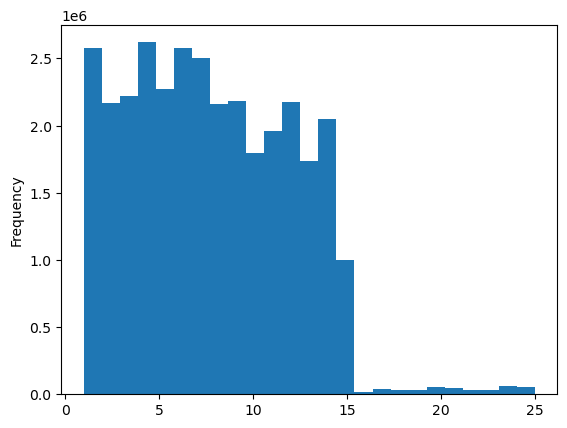

In [11]:
# histogram

df['prices'].plot.hist(bins = 25)

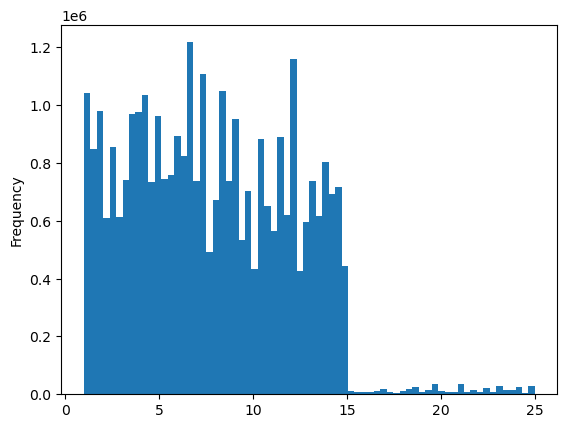

In [12]:
# trying denser granularity of bins

histo = df['prices'].plot.hist(bins = 70)

In [13]:
# exporting histogram

histo.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histo_product_prices.png'))

<Axes: xlabel='prices', ylabel='prices'>

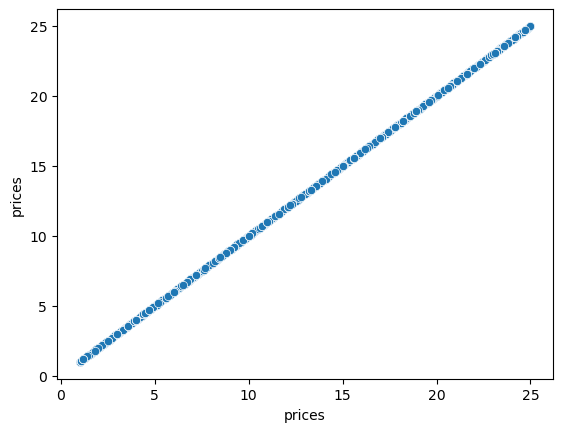

In [14]:
# scatterplot to find outliers in prices column

sns.scatterplot(x = 'prices', y = 'prices',data = df)

### Sampling data for line chart

In [15]:
#creating 70/30 subset with random values

np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [16]:
big = df[dev]
small = df[~dev]

In [17]:
#checking amount of rows

len(df)

32404859

In [18]:
len(big) + len(small)

32404859

In [19]:
# subsetting with needed columns

df_2 = small[['orders_day_of_week','prices']]

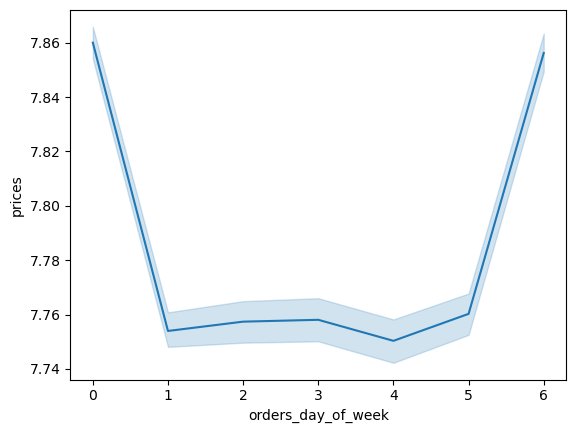

In [20]:
# line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [21]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_per_odow.png'))

# 3. Solving given tasks

### Step 3 create a histogram for order_hour_of_day column

Text(0, 0.5, 'Frequency of orders')

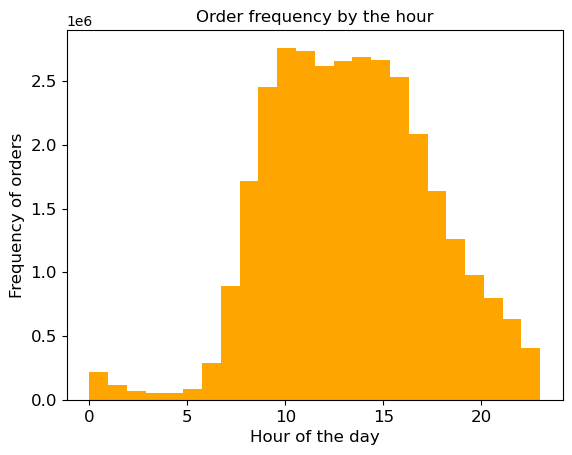

In [22]:
histo_ohod = df["order_hour_of_day"].hist(bins = 24, grid = False, color = "orange", xlabelsize = 12, ylabelsize = 12)
plt.title("Order frequency by the hour")
plt.xlabel("Hour of the day", fontsize = 12)
plt.ylabel("Frequency of orders", fontsize = 12)

#### The histogram shows that the amount of orders peak from 9am - 4pm.

In [23]:
# exporting histogram as histo_order_frequency_by_hour.png

histo_ohod.figure.savefig(os.path.join(path, "04 Analysis", "Visualizations", "histo_order_frequency_by_hour.png"))

### Step 4 create a bar chart for the loyalty flag

Text(0, 0.5, 'Orders')

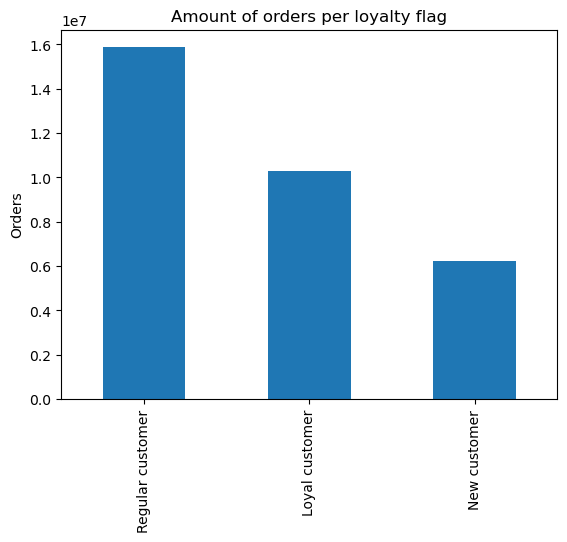

In [24]:
bar_loyal = df["loyalty_flag"].value_counts().plot.bar()
plt.title("Amount of orders per loyalty flag")
plt.ylabel("Orders")

In [25]:
# exporting bar chart as bar_loyalty_flag.png

bar_loyal.figure.savefig(os.path.join(path, "04 Analysis", "Visualizations", "bar_loyalty_flag.png"))

### Step 5 create a line chart for prices by the hour of the day

In [26]:
# using the settings from above :

# np.random.seed(4)
# dev = np.random.rand(len(df)) <= 0.7
# big = df[dev]
# small = df[~dev]

# creating a subset with needed columns:

df_3 = small[["order_hour_of_day","prices"]]

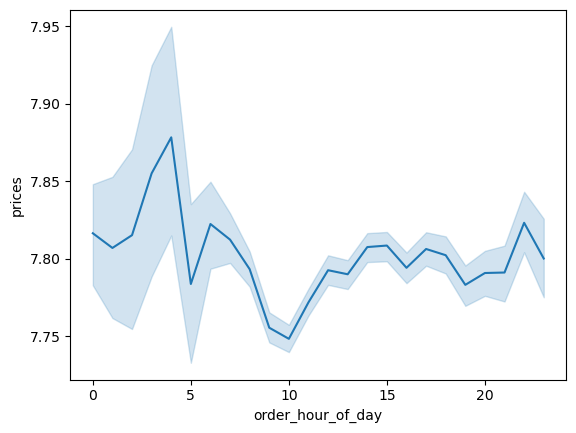

In [27]:
# creating a line chart with df_3

line_ohod_prices = sns.lineplot(data = df_3, x = "order_hour_of_day",y = "prices")

In [28]:
# exporting line chart as line_orders_by_hour.png

line_ohod_prices.figure.savefig(os.path.join(path, "04 Analysis", "Visualizations", "line_orders_by_hour.png"))

### Step 6 line chart for customer demographics

In [29]:
# creating a sample subset with age and number of dependents

df_4 = small[["Age","number_of_dependents"]]

(0.0, 2.0)

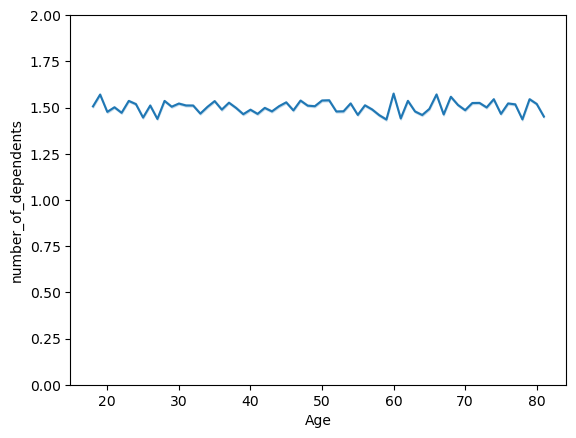

In [30]:
# creating a line chart with df_4

line_demographics = sns.lineplot(data = df_4, x = "Age",y = "number_of_dependents")
plt.ylim([0.0, 2.0])

#### There doesn't seem to be any significant connection between age and number of dependents.

In [31]:
# exporting line chart

line_demographics.figure.savefig(os.path.join(path, "04 Analysis", "Visualizations", "line_demographics.png"))

### Step 7 create a scatterplot to discover the relationship between age and spending power

Text(0.5, 1.0, 'Correlation between age and spending power')

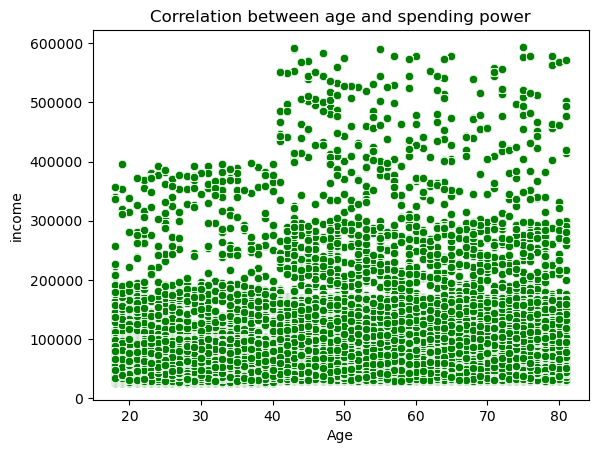

In [32]:
# scatterplot

scat_age_income = sns.scatterplot(x = "Age", y = "income",data = df, color = "green")
plt.title("Correlation between age and spending power")

#### The scatter plot doesn't show a correlation between age and income.

In [ ]:
# exporting scatterplot as scat_age_income.png

scat_age_income.figure.savefig(os.path.join(path, "04 Analysis", "Visualizations", "scat_age_income.png"))